# Modelos basados en árbol / Análisis y Predicción de Precios de Autos (Core)

Objetivo: Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

### Dataset: Automobile Dataset

Descripción del Dataset: Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

### Instrucciones:

### Parte 1: Análisis Exploratorio de Datos (EDA)

 1. Carga y Exploración de Datos:

* Cargar el dataset y revisar la estructura básica.
* Descripción de las variables y su distribución.
* Detección y tratamiento de valores nulos.
* Identificación y tratamiento de outliers.
* Análisis de correlación entre variables.

### Parte 2: Preparación de Datos

 2. Preprocesamiento:

* Selección de características importantes.
* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.

### Parte 3: Modelos de Regresión

 3. Regresión Lineal:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).
 

4. K-Nearest Neighbors (KNN):

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).
 
 5. Árbol de Decisión:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

### Parte 4: Benchmarking y Comparación de Modelos

 6. Comparación de Modelos:

* Comparar los resultados de los tres modelos en términos de MSE y R².
* Discusión sobre las diferencias en el rendimiento de los modelos.
* Conclusión

 7. Interpretación de Resultados:

* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

### Tareas Adicionales y Desafíos

 8. Desafíos Adicionales:

* Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
* Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
* Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.
* Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
import utils

#### **Exploratory Data Analisys**

In [221]:
data = pd.read_csv('../Data/Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Reemplazamos algunos valores que dan error

In [222]:
# Reemplazamos todos los '?' por NaN
data.replace('?', np.nan, inplace = True)

Convertimos a los Dtypes correctos

In [223]:
data_dict = {
    'symboling': 'float',
    'normalized-losses': 'float',
    'make': 'category',
    'fuel-type': 'category',
    'aspiration': 'category',
    'num-of-doors': 'category',
    'body-style': 'category',
    'drive-wheels': 'category',
    'engine-location': 'category',
    'wheel-base': 'float',
    'length': 'float',
    'width': 'float',
    'height': 'float',
    'curb-weight': 'float',
    'engine-type':'category',
    'num-of-cylinders':'category',
    'engine-size':'float',
    'fuel-system':'category',
    'bore':'float',
    'stroke':'float',
    'compression-ratio':'float',
    'horsepower':'float',
    'peak-rpm':'float',
    'city-mpg':'float',
    'highway-mpg':'float',
    'price': 'float',
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    data[column] = data[column].astype(dtype, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    float64 
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    category
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       203 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    float64 
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

Separamos en Categoricas y Numericas

In [224]:
# Seleccionamos las columnas numericas
data_num = data.select_dtypes(include=['int64','float'])
data_cat = data.select_dtypes(include=['category', 'object', 'bool'])

Consistencia en Columnas Categoricas

In [225]:
# Aplicar la limpieza a las columnas categóricas
for col in data_cat:
    data_cat[col] = data_cat[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in data_cat:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(data_cat[col].unique())


Valores únicos después de limpieza en 'make':
['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', ..., 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Length: 22
Categories (22, object): ['alfa-romero', 'audi', 'bmw', 'chevrolet', ..., 'subaru', 'toyota', 'volkswagen', 'volvo']

Valores únicos después de limpieza en 'fuel-type':
['gas', 'diesel']
Categories (2, object): ['diesel', 'gas']

Valores únicos después de limpieza en 'aspiration':
['std', 'turbo']
Categories (2, object): ['std', 'turbo']

Valores únicos después de limpieza en 'num-of-doors':
['two', 'four', NaN]
Categories (2, object): ['four', 'two']

Valores únicos después de limpieza en 'body-style':
['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Categories (5, object): ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

Valores únicos después de limpieza en 'drive-wheels':
['rwd', 'fwd', 'wd']
Categories (3, object): ['wd', 'fwd', 'rwd']

Valores únicos después de limpieza en 'engine-location':
['fro

Consistencia en Valores Numericos

In [226]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in data_num:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
symboling,205.0,0.83,1.00,1.25,-2.00,3.00,0.00,2.00
normalized-losses,164.0,122.00,115.00,35.44,65.00,256.00,94.00,150.00
wheel-base,205.0,98.76,97.00,6.02,86.60,120.90,94.50,102.40
length,205.0,174.05,173.20,12.34,141.10,208.10,166.30,183.10
width,205.0,65.91,65.50,2.15,60.30,72.30,64.10,66.90
height,205.0,53.72,54.10,2.44,47.80,59.80,52.00,55.50
curb-weight,205.0,2555.57,2414.00,520.68,1488.00,4066.00,2145.00,2935.00
engine-size,205.0,126.91,120.00,41.64,61.00,326.00,97.00,141.00
bore,201.0,3.33,3.31,0.27,2.54,3.94,3.15,3.59
stroke,201.0,3.26,3.29,0.32,2.07,4.17,3.11,3.41


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

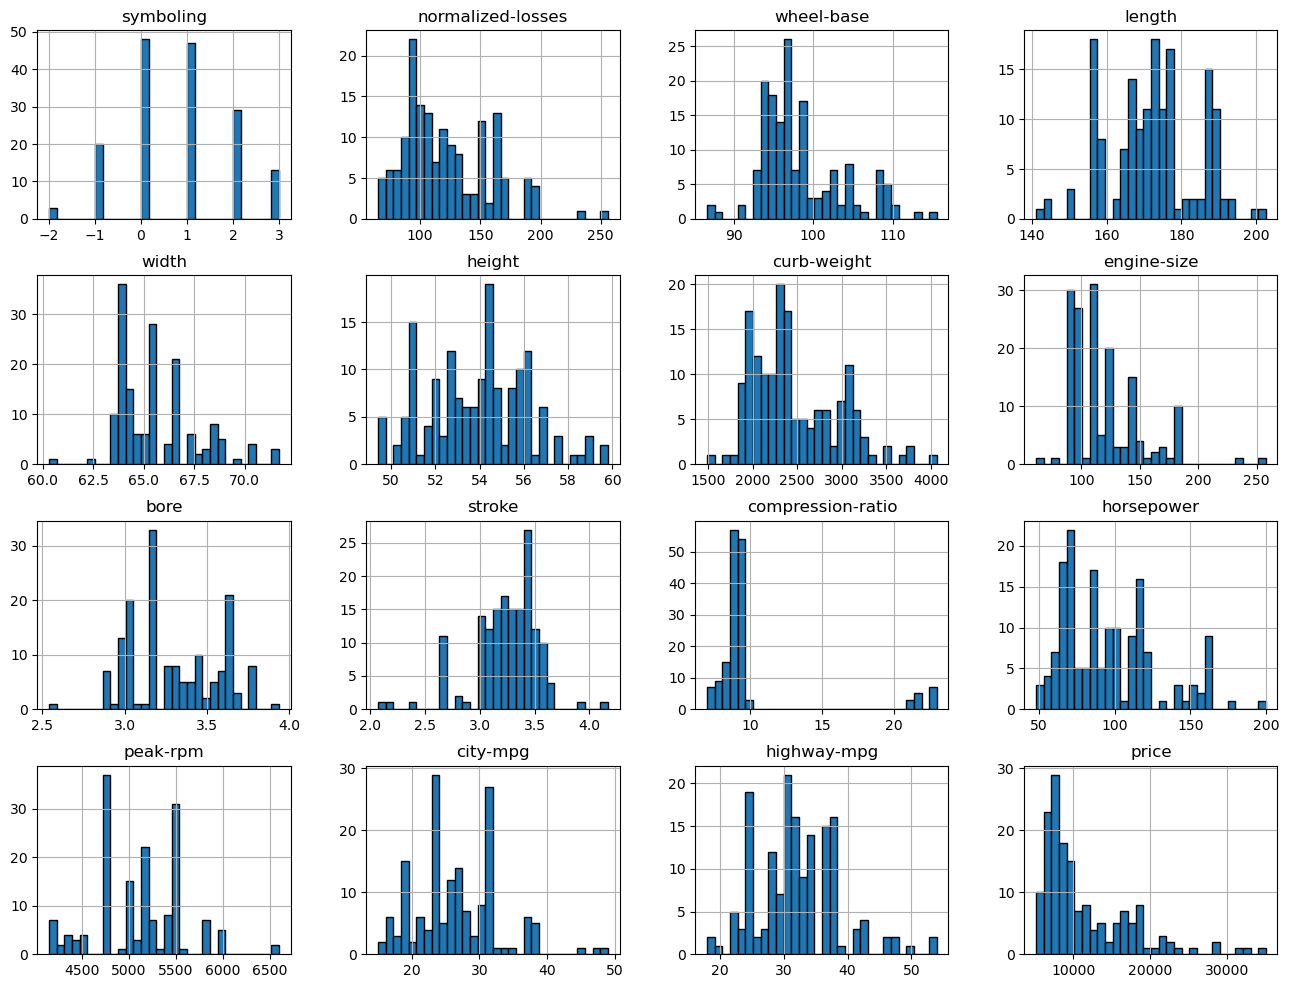

In [227]:
data_num.dropna().hist(figsize=(16, 12), bins=30, edgecolor='black')

La mayoría de las variables, como symboling, normalized-losses, wheel-base, curb-weight, compression-ratio, horsepower, peak-rpm, y price, presentan distribuciones sesgadas a la derecha, indicando que los valores bajos son más comunes que los altos, especialmente en price, compression-ratio y horsepower. 

Variables como length, width, height, y engine-size muestran distribuciones más variadas, con algunos picos en diferentes rangos que sugieren varios grupos de autos según esas características. city-mpg y highway-mpg muestran distribuciones con varios picos, lo que podría reflejar diferentes eficiencias de combustible según el tipo de vehículo. 

La mayoría de los datos se concentran en rangos específicos, pero hay algunas variables con valores atípicos que se desvían considerablemente del promedio.

In [228]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
symboling,0.0,0.000000,-2.00,3.00
normalized-losses,1.0,0.487805,65.00,231.00
wheel-base,3.0,1.463415,86.60,114.20
length,1.0,0.487805,144.60,208.10
width,8.0,3.902439,60.30,70.90
height,0.0,0.000000,47.80,59.80
curb-weight,0.0,0.000000,1488.00,4066.00
engine-size,10.0,4.878049,61.00,203.00
bore,0.0,0.000000,2.54,3.94
stroke,20.0,9.756098,2.68,3.86


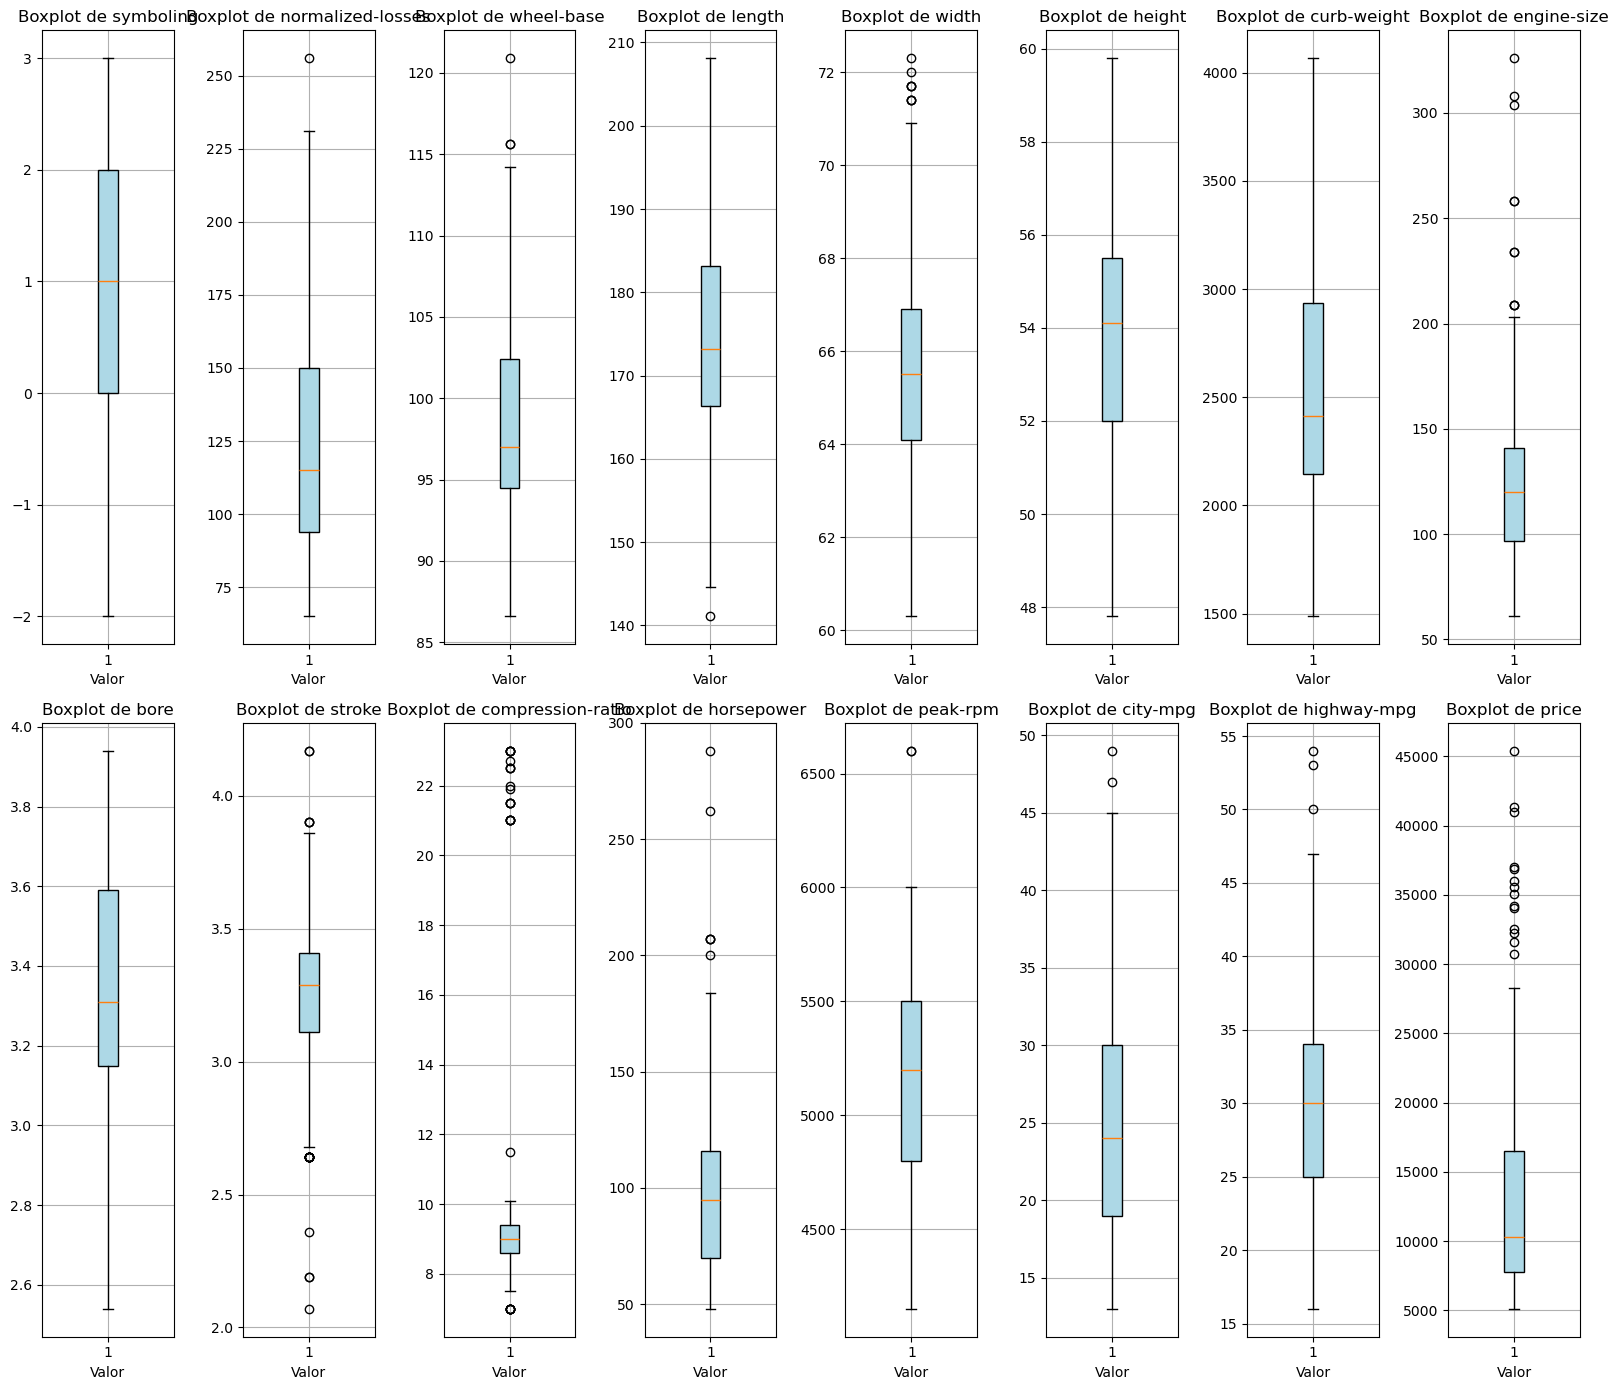

In [229]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(16, 14))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(data_num.columns):
    axes[i].boxplot(data_num[col].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Las variables como normalized-losses, wheel-base, length, width, engine-size, horsepower, peak-rpm, city-mpg, highway-mpg, y price presentan valores fuera de sus límites superiores, indicando outliers en sus valores altos. 

compression-ratio y stroke también muestran outliers en los límites superiores, mientras que la mayoría de las variables presentan una distribución más centralizada sin valores extremos significativos en los límites inferiores. 

In [230]:
utils.calculate_na_statistics(data_num)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
bore,201,4,1.95
stroke,201,4,1.95
price,201,4,1.95
horsepower,203,2,0.98
peak-rpm,203,2,0.98
symboling,205,0,0.00
wheel-base,205,0,0.00
length,205,0,0.00
width,205,0,0.00


In [231]:
data_num.dropna().corr(method='pearson')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518388,-0.520465,-0.336217,-0.219850,-0.473994,-0.252372,-0.110238,-0.257013,-0.020539,-0.139022,-0.003669,0.199798,0.088912,0.149309,-0.163329
normalized-losses,0.518388,1.000000,-0.064001,0.029114,0.104857,-0.417081,0.122860,0.203841,-0.036167,0.065627,-0.129971,0.290906,0.240676,-0.236934,-0.189691,0.199924
wheel-base,-0.520465,-0.064001,1.000000,0.871968,0.815935,0.558764,0.810507,0.650488,0.580484,0.164012,0.293968,0.514507,-0.292491,-0.576635,-0.608270,0.734789
length,-0.336217,0.029114,0.871968,1.000000,0.839184,0.505156,0.870355,0.726666,0.649059,0.116049,0.188968,0.666726,-0.239104,-0.716877,-0.717831,0.760323
width,-0.219850,0.104857,0.815935,0.839184,1.000000,0.298403,0.870649,0.780018,0.575048,0.192891,0.261530,0.678779,-0.235906,-0.662123,-0.689367,0.843316
height,-0.473994,-0.417081,0.558764,0.505156,0.298403,1.000000,0.369363,0.116505,0.261501,-0.095364,0.237432,0.032264,-0.251236,-0.194559,-0.221646,0.247500
curb-weight,-0.252372,0.122860,0.810507,0.870355,0.870649,0.369363,1.000000,0.888847,0.646640,0.171691,0.226513,0.788509,-0.262086,-0.759538,-0.787167,0.893810
engine-size,-0.110238,0.203841,0.650488,0.726666,0.780018,0.116505,0.888847,1.000000,0.597336,0.296693,0.143568,0.809855,-0.287260,-0.695890,-0.711364,0.841725
bore,-0.257013,-0.036167,0.580484,0.649059,0.575048,0.261501,0.646640,0.597336,1.000000,-0.105464,0.019216,0.557107,-0.315841,-0.585618,-0.586729,0.534891
stroke,-0.020539,0.065627,0.164012,0.116049,0.192891,-0.095364,0.171691,0.296693,-0.105464,1.000000,0.240895,0.149315,-0.008569,-0.021381,-0.013974,0.158798


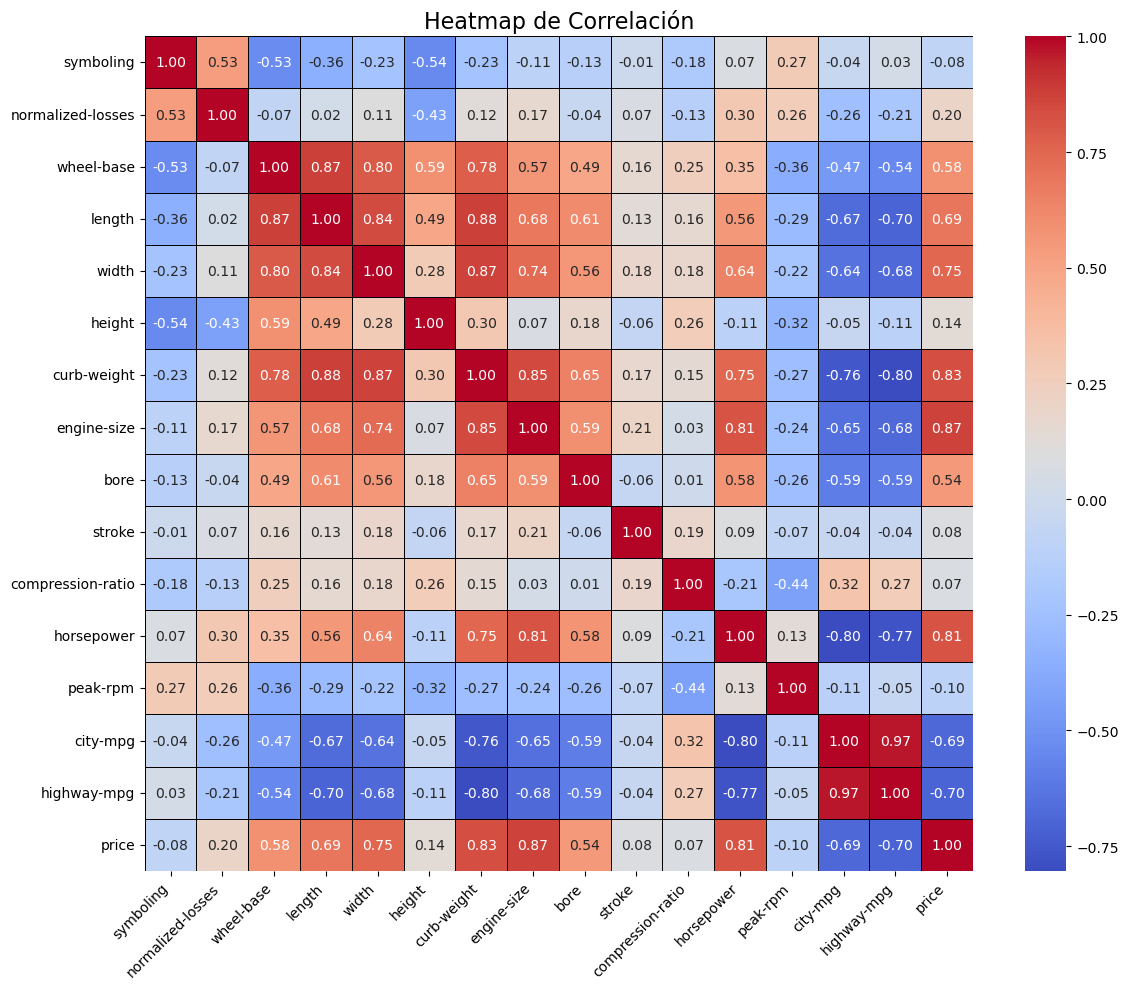

In [232]:
# Crear la figura y el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_num.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')

# Agregar título y ajustar el diseño
plt.title('Heatmap de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El mapa de calor muestra que el price se relaciona fuertemente con curb-weight, engine-size, y horsepower, lo que indica que vehículos más pesados y potentes son más caros. 

Además, city-mpg y highway-mpg tienen correlación negativa con estas mismas variables, sugiriendo que los vehículos grandes consumen más combustible.

### **Modeling**

#### **Linear Regression**

In [233]:
# Imputar valores faltantes en 'price' con 0
data_num['price'] = data_num['price'].fillna(0)

In [234]:
# Separar características y variable objetivo
X = data_num.drop(columns=['price'])
y = data_num['price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los transformadores para características numéricas y categóricas
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Imputación para valores numéricos (media en lugar de 0)
    ("scaler", StandardScaler())  # Escalado de datos
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación para valores categóricos (más frecuente)
    ("encoder", OneHotEncoder(handle_unknown='ignore'))  # Codificación de variables categóricas
])

# Combinar los transformadores en un ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("data_num", numerical_pipeline, X.select_dtypes(include=['float64', 'int']).columns),
        ("data_cat", categorical_pipeline, X.select_dtypes(include=['category', 'object']).columns)
    ],
    remainder='passthrough'  # Las columnas no especificadas se mantienen sin cambios
)

# Transformar los datos de entrenamiento y prueba
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_transformed, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test_transformed)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 22660601.6715443
R-cuadrado: 0.6932622963159735


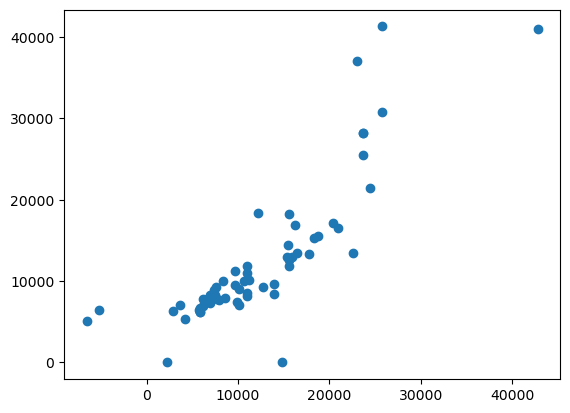

In [235]:
plt.scatter(y_pred,y_test)


#### **KNN Regressor**

In [236]:

# Separar características y variable objetivo
X = data_num.drop(columns=['price'])
y = data_num['price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los transformadores para características numéricas y categóricas
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),  # Imputación para valores numéricos
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación para valores categóricos
    ("encoder", OneHotEncoder())
])

# Combinar los transformadores en un ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("data_num", numerical_pipeline, X.select_dtypes(include=['float64', 'int']).columns),
        ("data_cat", categorical_pipeline, X.select_dtypes(include=['category', 'object']).columns)
    ],
    remainder='passthrough'
)

# Transformar el conjunto de entrenamiento y prueba
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
modelo = KNeighborsRegressor()
modelo.fit(X_train_transformed, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test_transformed)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')


Error Cuadrático Medio: 24847968.440645166
R-cuadrado: 0.6636537329779894


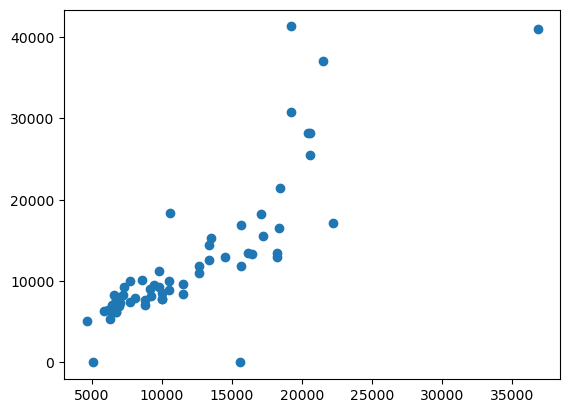

In [237]:
plt.scatter(y_pred,y_test)


#### **Random Forest Regressor**

In [238]:

# Separar características y variable objetivo
X = data_num.drop(columns=['price'])
y = data_num['price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los transformadores para características numéricas y categóricas
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),  # Imputación para valores numéricos
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación para valores categóricos
    ("encoder", OneHotEncoder())
])

# Combinar los transformadores en un ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("data_num", numerical_pipeline, X.select_dtypes(include=['float64', 'int']).columns),
        ("data_cat", categorical_pipeline, X.select_dtypes(include=['category', 'object']).columns)
    ],
    remainder='passthrough'
)

# Transformar el conjunto de entrenamiento y prueba
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
modelo = DecisionTreeRegressor()
modelo.fit(X_train_transformed, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test_transformed)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')


Error Cuadrático Medio: 25550417.241935484
R-cuadrado: 0.6541452682255304


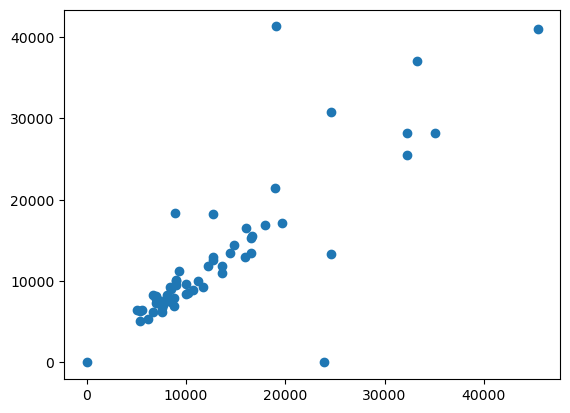

In [239]:
plt.scatter(y_pred,y_test)


### **3 Modelos a la Vez**

In [240]:
data2 = data.copy()
data2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [241]:
X = data2.drop(columns=['price'])
y = data2['price']

# Eliminar filas donde 'price' es NaN
mask = ~y.isna()  # Crear máscara de valores no-NaN
X = X[mask]
y = y[mask]


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.28, random_state=0, shuffle=True
)

# Definir transformaciones
numeric_features = X.select_dtypes(include=['float64', 'int']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['category', 'bool']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 1. Modelo KNN
# Crear pipeline completo incluyendo el modelo KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar el pipeline completo
pipeline_knn.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print('Resultados del modelo KNN:')
print(f'Error Cuadrático Medio: {mse_knn}')
print(f'R-cuadrado: {r2_knn}')

# 2. Modelo Árbol de Decisión
# Crear pipeline completo incluyendo el modelo de Árbol de Decisión
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=0))
])

# Entrenar el pipeline completo
pipeline_dt.fit(X_train, y_train)

# Realizar predicciones
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluar el modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\nResultados del modelo Árbol de Decisión:')
print(f'Error Cuadrático Medio: {mse_dt}')
print(f'R-cuadrado: {r2_dt}')

# 3. Modelo de Regresión Lineal
# Crear pipeline completo incluyendo el modelo de Regresión Lineal
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el pipeline completo
pipeline_lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('\nResultados del modelo de Regresión Lineal:')
print(f'Error Cuadrático Medio: {mse_lr}')
print(f'R-cuadrado: {r2_lr}')

Resultados del modelo KNN:
Error Cuadrático Medio: 28959016.896842107
R-cuadrado: 0.6793034551270417

Resultados del modelo Árbol de Decisión:
Error Cuadrático Medio: 9083728.94736842
R-cuadrado: 0.8994054080509483

Resultados del modelo de Regresión Lineal:
Error Cuadrático Medio: 3.802828070378789e+31
R-cuadrado: -4.211309476632701e+23


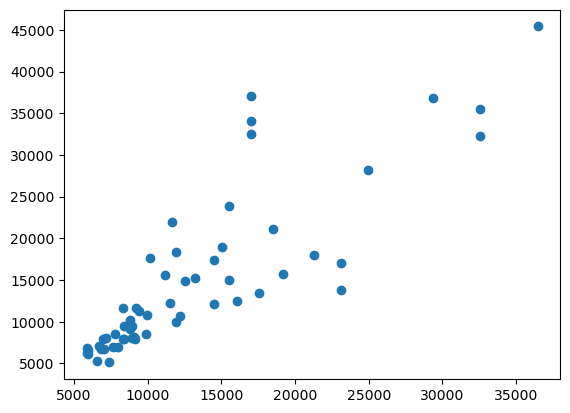

In [242]:
plt.scatter(y_pred_knn,y_test)

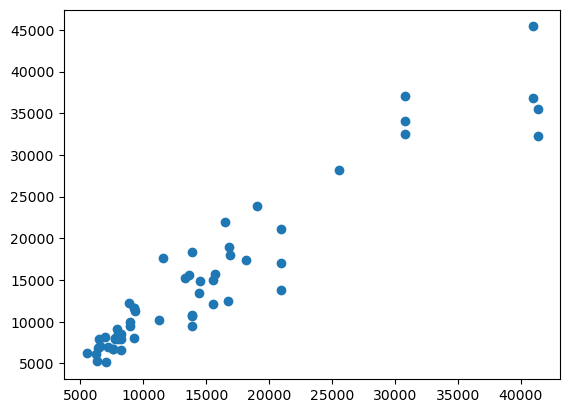

In [243]:
plt.scatter(y_pred_dt,y_test)

### **Validacion Cruzada**

In [244]:
# Separar características y variable objetivo
X = data_num.drop(columns=['price'])
y = data_num['price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los transformadores para características numéricas y categóricas
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),  # Imputación para valores numéricos
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación para valores categóricos
    ("encoder", OneHotEncoder())
])

# Combinar los transformadores en un ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("data_num", numerical_pipeline, X.select_dtypes(include=['float64', 'int']).columns),
        ("data_cat", categorical_pipeline, X.select_dtypes(include=['category', 'object']).columns)
    ],
    remainder='passthrough'
)

# Crear un imputador para la variable objetivo y con valor constante 0
target_imputer = SimpleImputer(strategy="constant", fill_value=0)

# Crear el pipeline final
pipeline = Pipeline([
    ('transformer', transformer),
    ('target_imputer', target_imputer),
    ('model', LinearRegression())
])

# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mostrar las puntuaciones de la validación cruzada (Error cuadrático medio negativo)
print(f"Cross-validation scores (MSE negativo): {cv_scores}")
print(f"Average Cross-validation score: {cv_scores.mean()}")

# Ajustar el modelo con imputación para X y y
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (Test): {mse}')
print(f'R-cuadrado (Test): {r2}')


Cross-validation scores (MSE negativo): [-16508628.73259171 -12874983.43674283 -11676486.84315727
 -16650785.02301961 -54579503.40923034]
Average Cross-validation score: -22458077.488948353
Error Cuadrático Medio (Test): 22072581.370586824
R-cuadrado (Test): 0.7012218377019279


### **Hiperparametros**

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

# Definir los parámetros para GridSearchCV para Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],  # Este es el parámetro que puedes ajustar
    'n_jobs': [-1, 1],  # Ajusta el número de trabajos paralelos, si es necesario
}

# Definir los parámetros para GridSearchCV para KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de ponderación
}

# Definir los parámetros para GridSearchCV para DecisionTreeRegressor
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras por hoja
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],  # Criterio de división
}

# Crear los modelos
modelo_lr = LinearRegression()
modelo_knn = KNeighborsRegressor()
modelo_dt = DecisionTreeRegressor()

# Configurar GridSearchCV para Linear Regression
grid_search_lr = GridSearchCV(estimator=modelo_lr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Configurar GridSearchCV para KNeighborsRegressor
grid_search_knn = GridSearchCV(estimator=modelo_knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Configurar GridSearchCV para DecisionTreeRegressor
grid_search_dt = GridSearchCV(estimator=modelo_dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar los modelos con el conjunto de entrenamiento escalado
grid_search_lr.fit(X_train_scaled, y_train)
grid_search_knn.fit(X_train_scaled, y_train)
grid_search_dt.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y el mejor modelo para cada regresor
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

# Imprimir los mejores parámetros para cada modelo
print("Mejores parámetros encontrados para LinearRegression: ", best_params_lr)
print("Mejores parámetros encontrados para KNeighborsRegressor: ", best_params_knn)
print("Mejores parámetros encontrados para DecisionTreeRegressor: ", best_params_dt)


Mejores parámetros encontrados para LinearRegression:  {'fit_intercept': True, 'n_jobs': -1}
Mejores parámetros encontrados para KNeighborsRegressor:  {'n_neighbors': 5, 'weights': 'distance'}
Mejores parámetros encontrados para DecisionTreeRegressor:  {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1}
